Project Title:
QODE NB CLASSIFIER

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [2]:
# dataset 
df_train = pd.read_csv("dataset_balanced_AI_QODE.csv")
df_train

,Rating,Cost(per hour USD),Instance
0,3.666667,0.0928,t2.large
1,2.000000,0.0832,B2ms
2,3.333333,0.0950,N1s2
3,3.333333,0.0150,Lin.G
4,2.666667,0.1000,c4.large
5,1.333333,0.0850,F2s
6,2.666667,0.0709,N1cc
7,3.000000,0.0450,Lin.C
8,3.666667,0.1330,r4.large
9,3.666667,0.1260,E2s


In [3]:
le = preprocessing.LabelEncoder()
df_train['instance']=le.fit_transform(df_train['Instance'])
df_train

,Rating,Cost(per hour USD),Instance,instance
0,3.666667,0.0928,t2.large,13
1,2.000000,0.0832,B2ms,0
2,3.333333,0.0950,N1s2,8
3,3.333333,0.0150,Lin.G,4
4,2.666667,0.1000,c4.large,9
5,1.333333,0.0850,F2s,2
6,2.666667,0.0709,N1cc,7
7,3.000000,0.0450,Lin.C,3
8,3.666667,0.1330,r4.large,12
9,3.666667,0.1260,E2s,1


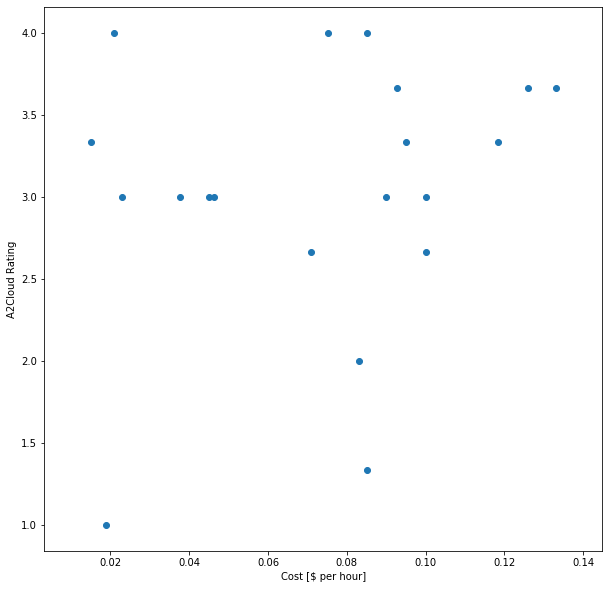

In [4]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df_train.iloc[:,1:2],df_train.iloc[:,0:1],  marker='o')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')
plt.show()

In [5]:
X=df_train.iloc[:,0:2]
model = KMeans(n_clusters = 3)
kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0],
      dtype=int32)

In [6]:
df_train

,Rating,Cost(per hour USD),Instance,instance
0,3.666667,0.0928,t2.large,13
1,2.000000,0.0832,B2ms,0
2,3.333333,0.0950,N1s2,8
3,3.333333,0.0150,Lin.G,4
4,2.666667,0.1000,c4.large,9
5,1.333333,0.0850,F2s,2
6,2.666667,0.0709,N1cc,7
7,3.000000,0.0450,Lin.C,3
8,3.666667,0.1330,r4.large,12
9,3.666667,0.1260,E2s,1


In [7]:

# K MEANS output
#static_label=pd.DataFrame([0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1]) # # 0: excellent, 1: avg, 2: bad cluster

#by observation 
static_label=pd.DataFrame([0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0]) # # 0: excellent, 1: avg, 2: bad cluster

df_train['cluster']=static_label

Text(0, 0.5, 'A2Cloud Rating')

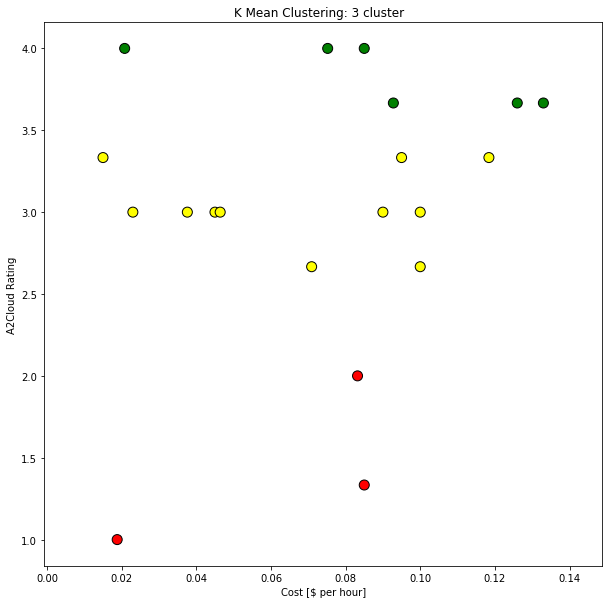

In [8]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow'])
plt.scatter(df_train.iloc[:,1:2], df_train.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 3 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')

In [9]:
xtrain=df_train[['Rating','Cost(per hour USD)']]
ytrain=df_train['cluster'].values.tolist()

In [10]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:

df_test = pd.read_csv("dataset_balanced_runtime_QODE 2.csv")
df_test

,Rating,Cost(per hour USD),Instance
0,3.333333,0.0928,t2.large
1,1.333333,0.0832,B2ms
2,3.000000,0.0950,N1s2
3,3.333333,0.0150,Lin.G
4,3.333333,0.1000,c4.large
5,3.000000,0.0850,F2s
6,2.666667,0.0709,N1cc
7,2.333333,0.0450,Lin.C
8,2.666667,0.1330,r4.large
9,2.666667,0.1260,E2s


In [12]:
#df_kmeans=df
X=df_test.iloc[:,0:2]
#y_actual=[0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2]# 0: excellent, 1: bad, 2: avg cluster 

#y_actual=[0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]# 0: excellent, 1: avg, 2: bad cluster  

model_test = KMeans(n_clusters = 3)

kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2],
      dtype=int32)

Text(0, 0.5, 'A2Cloud Rating')

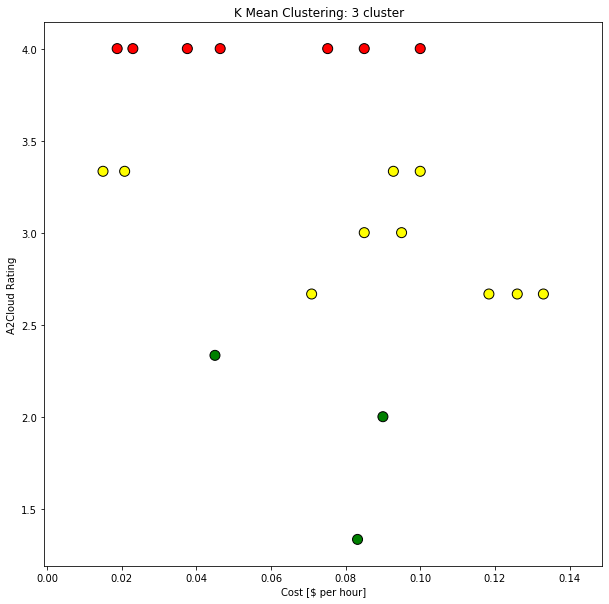

In [13]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow'])
plt.scatter(df_test.iloc[:,1:2], df_test.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 3 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')

In [14]:
y_actual=[1, 2, 1, 1, 1,1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1]      # k mean cluster output, 0: excellent, 1: bad, 2: avg cluster 
 
xtest=df_test[['Rating','Cost(per hour USD)']]

In [15]:
y_pred = classifier.predict(xtest)


In [16]:
y_pred = classifier.predict(xtest)


In [17]:
print(confusion_matrix(y_pred, y_actual))


[[ 7  0  0]
 [ 0 10  0]
 [ 0  1  2]]


In [18]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 95.0 %


In [19]:
print(classification_report(y_pred,y_actual))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      1.00      0.95        10
           2       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.89      0.92        20
weighted avg       0.95      0.95      0.95        20



In [20]:
mean_absolute_error(y_pred,y_actual)

0.05

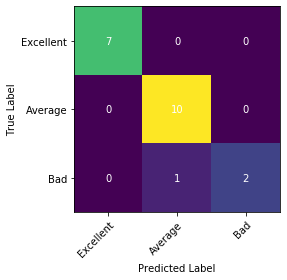

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

a_label = ["Excellent", "Average", "Bad"]
p_label = ["Excellent", "Average", "Bad"]

#harvest = np.array([[4,0,0],[0,0,0], [0,7,1]])
cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [22]:
y_actual


[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1]

In [23]:
y_pred

array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1])